TEXT CLASSIFICATION

Huge data were classified based on sentiments

In [20]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df = pd.read_csv('/content/nlp_dataset.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


TEXT PRE PROCESSING

In [22]:
stop_words = set(stopwords.words('english'))

# set stop_words in endlish


In [23]:
import re  # Make sure 're' is imported

In [24]:
def preprocess_text(text):
    # Convert to lowercase # Convert text in the column'Comment' to lowercase
    # Converts all characters in the text to lowercase to ensure uniformity.
    text = text.lower()

    # Remove punctuation # import
    #This step uses the re.sub() function from the re (regular expression) module to remove punctuation.
    #The re.sub() function replaces all matches of this pattern with an empty string ('')
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text:  Breaks the text into individual words (tokens).
    # This helps in separating the sentence into components for further processing.
    #The word_tokenize() function from the nltk.tokenize module splits the text into words or tokens.
    tokens = word_tokenize(text)
    # Remove stopwords
    #Removes common stopwords (like "the", "is", "in", etc.)
    #that do not carry much meaning and might not be useful for analysis.
    #This step checks each word in the list of tokens to see if it is in the predefined list of stopwords (from nltk.corpus.stopwords).
    #If a word is a stopword, it's excluded from the list. Only meaningful words remain.
    tokens = [word for word in tokens if word not in stop_words]
    # Combines the processed tokens back into a single string, with words separated by a space.
    return ' '.join(tokens)

In [25]:
# Apply the preprocessing function to the 'comment' column and store it in 'preprocessed_comment'
df['preprocessed_comment'] = df['Comment'].apply(preprocess_text)

Vectorization (Converting text to Numerical form)

1. BOW (Bag of Words)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
xbowdata = cv.fit_transform(df['preprocessed_comment'])

In [27]:
xbowdata

<5937x8815 sparse matrix of type '<class 'numpy.int64'>'
	with 53875 stored elements in Compressed Sparse Row format>

2. TFI-IDF (Term Frequency-Inverse Document Frequency)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
xtfidfdata = tfidf.fit_transform(df['preprocessed_comment'])

In [29]:
xtfidfdata

<5937x8815 sparse matrix of type '<class 'numpy.float64'>'
	with 53875 stored elements in Compressed Sparse Row format>

Model BUILDIING ON THE DATA (BOW AND TFI-IDF DATA SEPERATELY)


Once the text is vectorized, you can use it for building a machine learning model. For example, if you want to classify emotions (emotion column), you could train a classifier:
#

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.linear_model import LogisticRegression

In [38]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(xbowdata, df['Emotion'], test_size=0.2, random_state=42)

In [34]:
x_train

<4749x8815 sparse matrix of type '<class 'numpy.int64'>'
	with 43040 stored elements in Compressed Sparse Row format>

In [37]:
y_train

,Emotion
4945,joy
5428,fear
1344,anger
1888,anger
2480,fear
...,...
3772,anger
5191,fear
5226,anger
5390,fear


In [40]:
# Train a classifier
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [42]:
# Predict on test data
y_pred = model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.952020202020202


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.94      0.96      0.95       392
        fear       0.96      0.93      0.94       416
         joy       0.95      0.97      0.96       380

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188



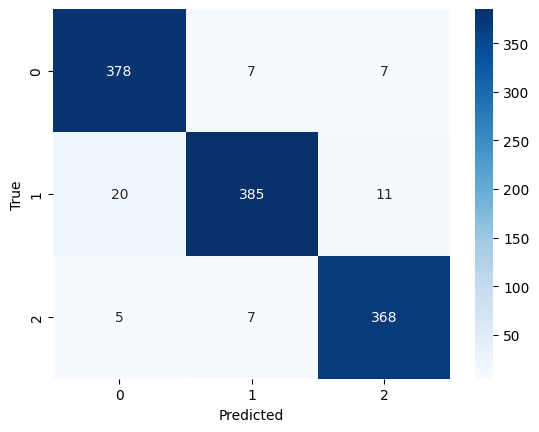

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# Initialize models
nb_model = MultinomialNB()      # Naive Bayes
svm_model = SVC(kernel='linear') # Support Vector Machine with linear kernel

# Train both models
nb_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

# Predict using both models
y_pred_nb = nb_model.predict(x_test)    # Predictions from Naive Bayes
y_pred_svm = svm_model.predict(x_test)  # Predictions from SVM

# Evaluate both models
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'SVM Accuracy: {accuracy_svm}')

Naive Bayes Accuracy: 0.8947811447811448
SVM Accuracy: 0.9553872053872053


In [53]:
# Classification reports for detailed metrics
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.93      0.90       392
        fear       0.88      0.92      0.90       416
         joy       0.93      0.83      0.88       380

    accuracy                           0.89      1188
   macro avg       0.90      0.89      0.89      1188
weighted avg       0.90      0.89      0.89      1188


SVM Classification Report:
              precision    recall  f1-score   support

       anger       0.94      0.96      0.95       392
        fear       0.97      0.94      0.95       416
         joy       0.95      0.97      0.96       380

    accuracy                           0.96      1188
   macro avg       0.96      0.96      0.96      1188
weighted avg       0.96      0.96      0.96      1188



SVM outperforms Naive Bayes with higher accuracy (96% vs. 89%) and better scores across all metrics for all classes.

Model BUILDIING ON THE DATA (TFI-IDF DATA )

In [54]:
# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(xtfidfdata, df['Emotion'], test_size=0.2, random_state=42)

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# Support Vector Machine with linear kernel
# Initialize models
nb_modelTIF = MultinomialNB()      # Naive Bayes
svm_modelTIF = SVC(kernel='linear') # Support Vector Machine with linear kernel

# Train both models
nb_modelTIF.fit(x_train, y_train)
svm_modelTIF.fit(x_train, y_train)


# Predict using both models
Y_pred_nbTIF = nb_modelTIF.predict(X_test)    # Predictions from Naive Bayes
Y_pred_svmTIF = svm_modelTIF.predict(X_test)  # Predictions from SVM

# Evaluate both models
accuracy_nbTIF = accuracy_score(Y_test, Y_pred_nbTIF)
accuracy_svmTIF = accuracy_score(Y_test, Y_pred_svmTIF)
print(f'Naive Bayes Accuracy: {accuracy_nbTIF}')
print(f'SVM Accuracy: {accuracy_svmTIF}')

Naive Bayes Accuracy: 0.8872053872053872
SVM Accuracy: 0.8863636363636364


In [57]:
# Classification reports for detailed metrics
print("\nNaive Bayes Classification Report:")
print(classification_report(Y_test, Y_pred_nbTIF))

print("\nSVM Classification Report:")
print(classification_report(Y_test, Y_pred_svmTIF))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.91      0.89       392
        fear       0.88      0.92      0.90       416
         joy       0.91      0.83      0.87       380

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.89      0.89      0.89      1188


SVM Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.93      0.90       392
        fear       0.98      0.76      0.85       416
         joy       0.84      0.98      0.90       380

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.90      0.89      0.88      1188



Here the vectorisation done by TF-IDF data, and model building done over it with two models, and among that SVM outperformed.